In [5]:
# Chargement et étude rapide du jeu de données Pima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
DF = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
DF

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire


# QUICK REDUCT G

In [3]:
#_______________________ File selection box
filename = 'breast10D.csv' # show an "Open" dialog box and return the path to the selected file
Cfilename ='breast10.csv'
#_______________________ Converting csv file to list
#df = pd.read_csv(filename)#,index_col=True)
U = DF.values.tolist()
U = [[index] + value for index , value in enumerate(U) ]


In [4]:
U

[[0,
  1,
  6,
  2012,
  29,
  57,
  18,
  0.0,
  65.7,
  3.4,
  7.6,
  1.3,
  3.4,
  0.5,
  'not fire   '],
 [1,
  2,
  6,
  2012,
  29,
  61,
  13,
  1.3,
  64.4,
  4.1,
  7.6,
  1.0,
  3.9,
  0.4,
  'not fire   '],
 [2,
  3,
  6,
  2012,
  26,
  82,
  22,
  13.1,
  47.1,
  2.5,
  7.1,
  0.3,
  2.7,
  0.1,
  'not fire   '],
 [3,
  4,
  6,
  2012,
  25,
  89,
  13,
  2.5,
  28.6,
  1.3,
  6.9,
  0.0,
  1.7,
  0.0,
  'not fire   '],
 [4,
  5,
  6,
  2012,
  27,
  77,
  16,
  0.0,
  64.8,
  3.0,
  14.2,
  1.2,
  3.9,
  0.5,
  'not fire   '],
 [5, 6, 6, 2012, 31, 67, 14, 0.0, 82.6, 5.8, 22.2, 3.1, 7.0, 2.5, 'fire   '],
 [6, 7, 6, 2012, 33, 54, 13, 0.0, 88.2, 9.9, 30.5, 6.4, 10.9, 7.2, 'fire   '],
 [7, 8, 6, 2012, 30, 73, 15, 0.0, 86.6, 12.1, 38.3, 5.6, 13.5, 7.1, 'fire   '],
 [8,
  9,
  6,
  2012,
  25,
  88,
  13,
  0.2,
  52.9,
  7.9,
  38.8,
  0.4,
  10.5,
  0.3,
  'not fire   '],
 [9,
  10,
  6,
  2012,
  28,
  79,
  12,
  0.0,
  73.2,
  9.5,
  46.3,
  1.3,
  12.6,
  0.9,
  'not fire

In [5]:
#________________________ Equivalence partition function
def equivalence_partition( iterable , index ):
    classes = []
    dclasses = {}
    #print("index : ",index,"\n\n")
    for o in iterable: # for each object
        # find the class it is in
        found = False
        for c in classes:
            indice_ele = next(iter(c))
            element = [iterable[indice_ele][ind] == o[ind] for ind in index]
            if all(element): # is it equivalent to this class?
                c.add( o[0])
                dclasses[o[0]] = c
                found = True
                break
        if not found: # it is in a new class
            classes.append( set([o[0]]))
            dclasses[o[0]] = classes[-1]
    return classes,dclasses

#_________________________ Finding lower approximation and positif region
def lower_appr(B):
    ind_B = equivalence_partition( U , B )[1]
    ind_d = equivalence_partition( U , D )[1]
    #print("DANS lower_appr >>>>> le résultat de equivalence_partition avec U,B : ",ind_B,"\n\n")
    #print("DANS lower_appr >>>>> le résultat de equivalence_partition avec U,D : ",ind_d,"\n\n")
    lower_appr_set = set()
   
    for x,ele in enumerate(U):
        if ind_B[x].issubset(ind_d[x]):
            lower_appr_set.add(x)
    
    return lower_appr_set
#________________________ Finding dependencey of features
def degre_dep(B):
    #print("DANS Positive ragion (gamma) >>>>> la fraction de calcul : la longueur ",len(lower_appr(B))," de ça : ",lower_appr(B),
          #"\nsur la longeur de U ",len(U))
    return float(len(lower_appr(B)))/float(len(U))

In [6]:
#_________________________ Rough set feature selection quickreduct algorithm
def qreduct(C):
    
    R = set()
    
    while True:
        #print("avant la boucle : R = ",R,"\n")
        T = R
    
        for x in C-R:
             if degre_dep(R.union(set([x]))) > degre_dep(T):
                #print("T = ",T,"          set de x : ",set[x],"\n")
                T = R.union(set([x]))
        #print("aprés la boucle : T = ",T,"\n")
        R = T
        
        if degre_dep(R) == degre_dep(C):
                break
    
    return R

In [7]:
decision=len(DF.columns)#_________ defining le decision index
D = [decision]           
B = set([ i for i in range(1,decision)]) #__________ defining condition index

In [99]:
Features= qreduct(B)

index :  {1} 


index :  [14] 


index :  set() 


index :  [14] 


index :  {2} 


index :  [14] 


index :  {1} 


index :  [14] 


index :  {3} 


index :  [14] 


index :  {1} 


index :  [14] 


index :  {4} 


index :  [14] 


index :  {1} 


index :  [14] 


index :  {5} 


index :  [14] 


index :  {1} 


index :  [14] 


index :  {6} 


index :  [14] 


index :  {5} 


index :  [14] 


index :  {7} 


index :  [14] 


index :  {5} 


index :  [14] 


index :  {8} 


index :  [14] 


index :  {7} 


index :  [14] 


index :  {9} 


index :  [14] 


index :  {8} 


index :  [14] 


index :  {10} 


index :  [14] 


index :  {8} 


index :  [14] 


index :  {11} 


index :  [14] 


index :  {10} 


index :  [14] 


index :  {12} 


index :  [14] 


index :  {10} 


index :  [14] 


index :  {13} 


index :  [14] 


index :  {10} 


index :  [14] 


index :  {10} 


index :  [14] 


index :  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13} 


index :  [14] 


index :  {1, 10} 


index 

In [107]:
print("Features indexes : ",Features,"\n")

features_list = list(Features)

for i in range(0,len(features_list)) :
    print(DF.columns.values[features_list[i]])

Features indexes :  {1, 10} 

month
ISI


# FRFS preprocessor

In [75]:
from frlearn.feature_preprocessors import FRFS
# Create an instance of the FRFS preprocessor and process the data.

# retirer les espaces dans les valeurs du target sinon il y aura plus de deux classes 
print(DF.Classes.unique())
DF.Classes=DF.Classes.str.strip()
print(DF.Classes.unique())

#REPLACE STRING VALUES WITH NUMERIC EQUIVALENT FOR THE production COLUMN
DF.iloc[0:len(DF),13].replace(DF["Classes"].unique(),range(0,DF["Classes"].unique().size),inplace=True)

X = DF.drop('Classes', axis=1)
y = DF[["Classes"]]


['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire ']
['not fire' 'fire']


In [76]:
DF["Classes"].unique()

array([0, 1], dtype=object)

In [52]:

preprocessor = FRFS(n_features=4)
model = preprocessor(X.values, y.values)
X_FRFS = model(X.values)

In [53]:
X_FRFS

array([[1.000e+00, 6.000e+00, 2.012e+03, 2.900e+01],
       [2.000e+00, 6.000e+00, 2.012e+03, 2.900e+01],
       [3.000e+00, 6.000e+00, 2.012e+03, 2.600e+01],
       [4.000e+00, 6.000e+00, 2.012e+03, 2.500e+01],
       [5.000e+00, 6.000e+00, 2.012e+03, 2.700e+01],
       [6.000e+00, 6.000e+00, 2.012e+03, 3.100e+01],
       [7.000e+00, 6.000e+00, 2.012e+03, 3.300e+01],
       [8.000e+00, 6.000e+00, 2.012e+03, 3.000e+01],
       [9.000e+00, 6.000e+00, 2.012e+03, 2.500e+01],
       [1.000e+01, 6.000e+00, 2.012e+03, 2.800e+01],
       [1.100e+01, 6.000e+00, 2.012e+03, 3.100e+01],
       [1.200e+01, 6.000e+00, 2.012e+03, 2.600e+01],
       [1.300e+01, 6.000e+00, 2.012e+03, 2.700e+01],
       [1.400e+01, 6.000e+00, 2.012e+03, 3.000e+01],
       [1.500e+01, 6.000e+00, 2.012e+03, 2.800e+01],
       [1.600e+01, 6.000e+00, 2.012e+03, 2.900e+01],
       [1.700e+01, 6.000e+00, 2.012e+03, 3.000e+01],
       [1.800e+01, 6.000e+00, 2.012e+03, 3.100e+01],
       [1.900e+01, 6.000e+00, 2.012e+03, 3.100

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

[1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1]


C:\Users\Poundji\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6823529411764706

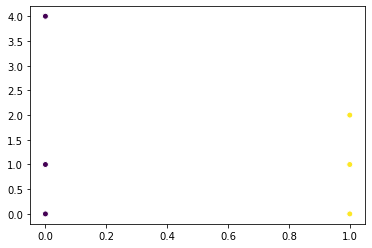

In [57]:

# Créer un modèle de régression logistique
model = LogisticRegression()



x_train, x_test,y_train,y_test = train_test_split(X_FRFS,y,test_size=0.3,random_state = 42)
        
    
# necessary instruction so sklearn can recognize its type in the fit() method and others 
y_train=y_train.astype('int')
y_test=y_test.astype('int')    
    
# Entraîner le modèle avec les données d'entraînement
model.fit(x_train, y_train.values.ravel())

y_pred = model.predict(x_test)
print(y_pred)

plt.scatter( y_pred , y_test , marker="o", c=y_pred, edgecolor="w")
        
#afficher le score du modele
model.score(x_train, y_train.values.ravel())

# Feature selection with non RST method (SelectFromModel method with coefs of an estimator used by a meta estimator)


In [68]:
X.index

RangeIndex(start=0, stop=122, step=1)

In [104]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier

# transformer les étiquettes en int
y= y.astype('int')

selector = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
selector.fit_transform(X, y)
#selector.estimator_.coef_
selector.get_support()
tmp_list = [7,8,9,11]
tmp_res= []
for elem in tmp_list :
    print(DF.columns[elem])
    tmp_res.append(DF.columns[elem])

print(tmp_res)
X_Non_RST = DF[tmp_res]
X_Non_RST

FFMC
DMC
DC
BUI
['FFMC', 'DMC', 'DC', 'BUI']


C:\Users\Poundji\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,FFMC,DMC,DC,BUI
0,65.7,3.4,7.6,3.4
1,64.4,4.1,7.6,3.9
2,47.1,2.5,7.1,2.7
3,28.6,1.3,6.9,1.7
4,64.8,3.0,14.2,3.9
...,...,...,...,...
117,82.0,6.0,16.3,6.2
118,85.7,8.3,24.9,9.0
119,77.5,7.1,8.8,6.8
120,47.4,2.9,7.7,3.0
